# Name : Raktima Dey

## The Sparks Foundation : Graduation Rotational Internship Program

## Data Science and Business Analytics Intern

## Task 2 : Prediction using Unsupervised ML

### Problem : From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

### Importing the dataset

In [2]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.shape

(150, 5)

### Data visualization

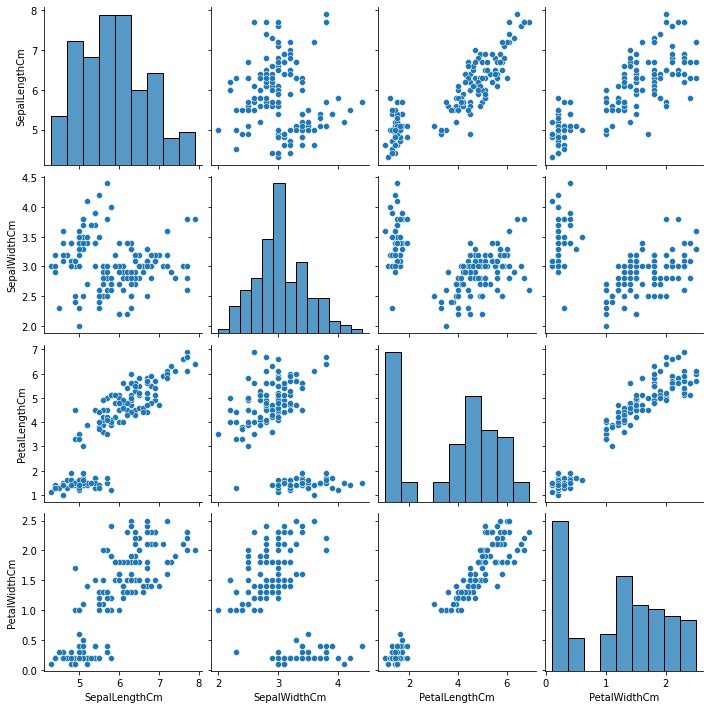

In [5]:
sns.pairplot(iris_df)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

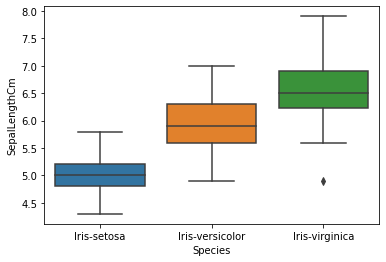

In [6]:
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

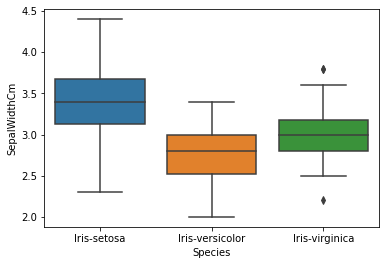

In [7]:
sns.boxplot(x="Species",y="SepalWidthCm",data=iris_df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

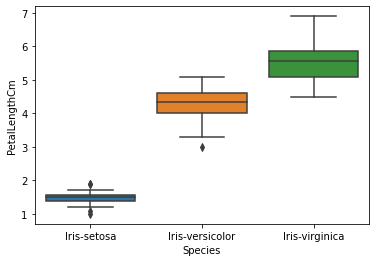

In [8]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris_df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

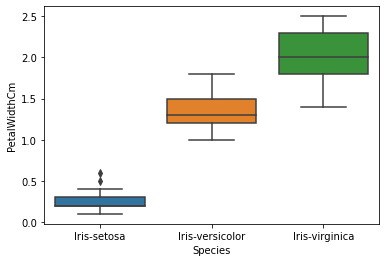

In [9]:
sns.boxplot(x="Species",y="PetalWidthCm",data=iris_df)

### Determination of correlation coefficient between the variables

In [10]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Heatmap

<AxesSubplot:>

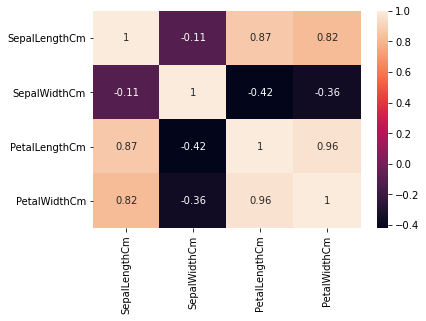

In [11]:
sns.heatmap(iris_df.corr(),annot=True)

### Determining the number of clusters using Elbow method

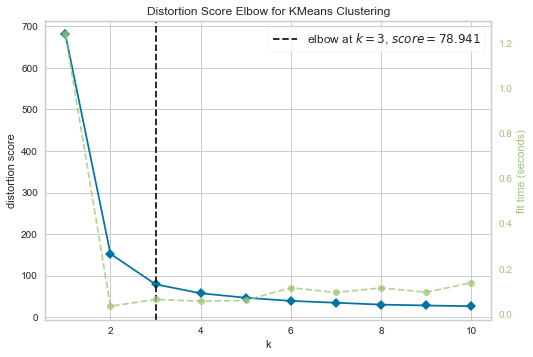

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model=KMeans()
X=iris_df.iloc[:,[0,1,2,3]].values
visualizer=KElbowVisualizer(model,k=(1,11),timings=True)
visualizer.fit(X)
visualizer.show()

### From the above diagram it can be observed that the elbow is at k=3 i,e the optimum number of clusters = 3

### Implement k-means clustering with k = 3

In [19]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [20]:
centroids=kmeans.cluster_centers_
print(centroids)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


## Visualizing Clustering

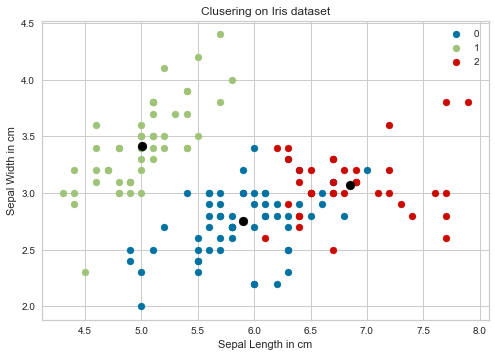

In [16]:
# Visualising the clusters - On the first two columns
u_labels=np.unique(y_kmeans)
for i in u_labels:
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],label=i)
plt.scatter(centroids[:,0],centroids[:,1],s=80,color='black')
plt.title('Clusering on Iris dataset')
plt.ylabel('Sepal Width in cm')
plt.xlabel('Sepal Length in cm')
plt.legend()
plt.show()

## Evaluating the accuracy of the Cluster Results

In [21]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
iris_df.Species=le.fit_transform(iris_df.Species)
y=iris_df.iloc[:,4].values
print(classification_report(y,y_kmeans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



#### It can be seen that the accuracy is 89%. It can also be observed that the average precision is 91% and the average recall is 89%. Hence it can be concluded that our model is giving highly accurate results.